In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install ipywidgets
from ipywidgets import interact
import ipywidgets as widgets
#!pip install apyori
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from math import pi

In [5]:
df = pd.read_csv('FIFA_train.csv')
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [6]:
df.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [10]:
df.isnull()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,False,False,False,False,False,False,False,False,False,False,False,False
8928,False,False,False,False,False,False,False,False,False,False,False,False
8929,False,False,False,False,False,False,False,False,False,False,False,False
8930,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [94]:
df2 = df.copy()
df2.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.00000,94,94,4.00000,110500000.00000
1,3,De Gea,27,europe,2020,GK,right,4.00000,91,93,1.00000,72000000.00000
2,7,L. Suárez,31,south america,2021,ST,right,5.00000,91,91,3.00000,80000000.00000
3,8,Sergio Ramos,32,europe,2020,DF,right,4.00000,91,91,3.00000,51000000.00000
4,9,J. Oblak,25,europe,2021,GK,right,3.00000,90,93,1.00000,68000000.00000


In [95]:
#id컬럼 삭제
df2=df2.drop(["id"],axis=1)
df2.tail()

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8927,S. Adewusi,18,africa,2019,MF,right,1.00000,48,63,3.00000,60000.00000
8928,C. Ehlich,19,europe,2020,DF,right,1.00000,47,59,2.00000,40000.00000
8929,N. Fuentes,18,south america,2021,DF,right,1.00000,47,64,2.00000,50000.00000
8930,J. Milli,18,europe,2021,GK,right,1.00000,47,65,1.00000,50000.00000
8931,N. Christoffersson,19,europe,2020,ST,right,1.00000,47,63,2.00000,60000.00000


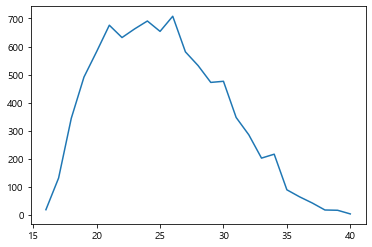

In [79]:
#나이 분포 16세부터 40세까지 , 나이별 인원수
df2["age"].value_counts().sort_index().plot()

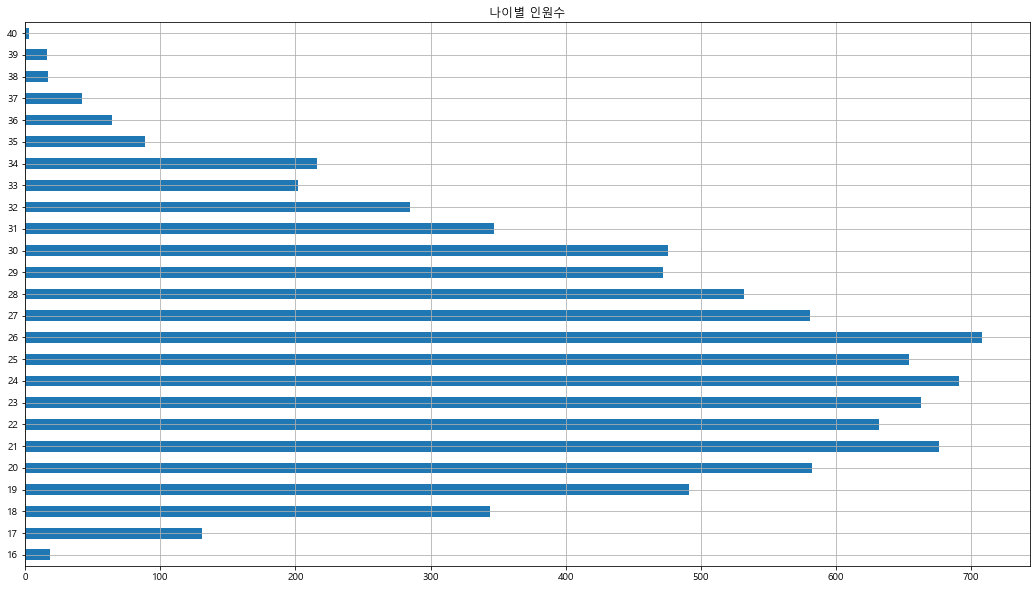

In [87]:
#나이 분포 16세부터 40세까지 , 나이별 인원수
df2["age"].value_counts().sort_index().plot.barh(title = "나이별 인원수",figsize=(18,10),grid=True)

In [40]:
pd.options.display.float_format = '{:.5f}'.format
plt.rc("font", family="Malgun Gothic")

In [58]:
age_v = df.groupby(["age"])["value"].agg(["mean"])
age_v

,mean
age,
16,279166.66667
17,429770.99237
18,592020.34884
19,918747.45418
20,1294974.22680
21,2091242.60355
22,2499311.70886
23,3124215.68627
24,3325759.76845


In [55]:
age_v2 = df2.groupby(["age"])["value"].max()
age_v2

age
16     1000000.00000
17    17500000.00000
18    27000000.00000
19    29000000.00000
20    23500000.00000
21    41000000.00000
22    54000000.00000
23    50500000.00000
24    57000000.00000
25    68000000.00000
26    73500000.00000
27    72000000.00000
28    45000000.00000
29    59000000.00000
30    57000000.00000
31   110500000.00000
32    60000000.00000
33    27000000.00000
34    21500000.00000
35     9000000.00000
36    14000000.00000
37     8000000.00000
38      750000.00000
39     1600000.00000
40     4000000.00000
Name: value, dtype: float64

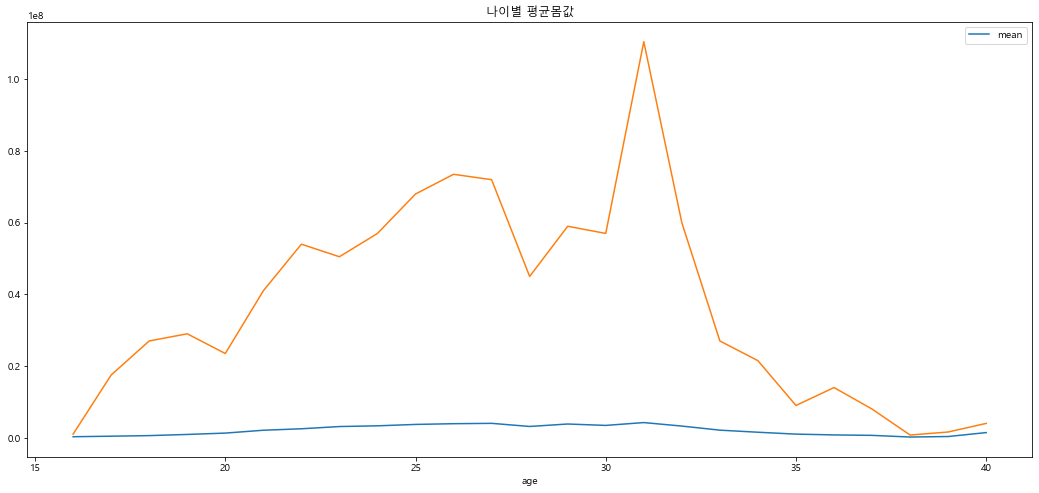

In [61]:
age_v.plot(title="나이별 평균몸값",figsize=(18,8),grid=True,secondary_y="age_v2")
age_v2.plot()

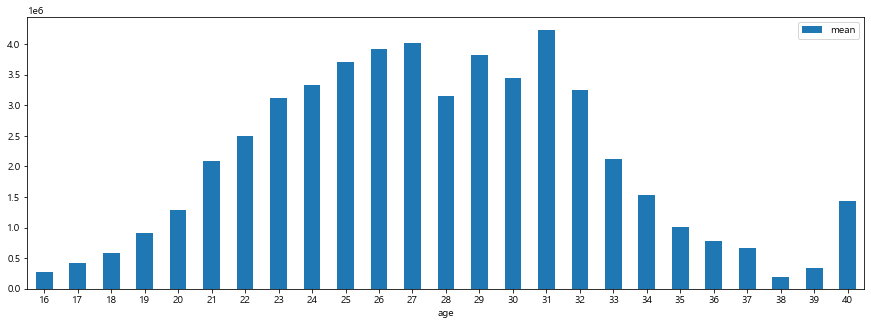

In [45]:
age_value.plot.bar(rot=0,figsize=(15,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C172286310>]],
      dtype=object)

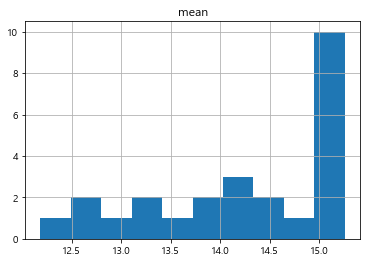

In [63]:
np.log1p(age_v).hist()

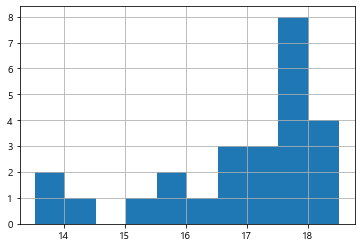

In [64]:
np.log1p(age_v2).hist()

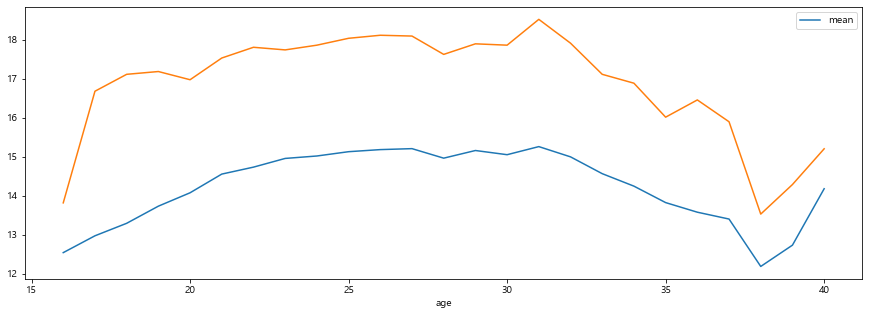

In [65]:
#나이별 평균몸값 ,나이별 최고몸값 로그취해서 그린 그래프
np.log1p(age_v).plot(figsize=(15,5)) #평균몸값
np.log1p(age_v2).plot() #최고몸값

In [100]:
df2.tail()

,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
8927,S. Adewusi,18,africa,2019,MF,right,1.00000,48,63,3.00000,60000.00000
8928,C. Ehlich,19,europe,2020,DF,right,1.00000,47,59,2.00000,40000.00000
8929,N. Fuentes,18,south america,2021,DF,right,1.00000,47,64,2.00000,50000.00000
8930,J. Milli,18,europe,2021,GK,right,1.00000,47,65,1.00000,50000.00000
8931,N. Christoffersson,19,europe,2020,ST,right,1.00000,47,63,2.00000,60000.00000


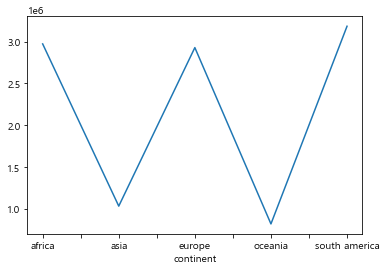

In [117]:
# 대륙별 평균 몸값
value_c = df2.groupby(["continent"])["value"].mean().plot()